# Random sampling from the Poisson kernel-based density

In this example, we generate observations from the Poisson kernel-based 
distribution on the sphere, $S^{d-1}$. 
We consider mean direction $\mu=(0,0,1)$, $d=3$ and the concentration
parameter is $\rho = 0.8$. We sampled $n=1000$ observations for each method available.

In [1]:
from QuadratiK.spherical_clustering import PKBD
from QuadratiK.tools import sphere3d

pkbd = PKBD()
x_rejvmf = pkbd.rpkb(1000, [0, 1, 1], 0.8, "rejvmf", random_state=42)
x_rejacg = pkbd.rpkb(1000, [0, 1, 1], 0.8, "rejacg", random_state=42)

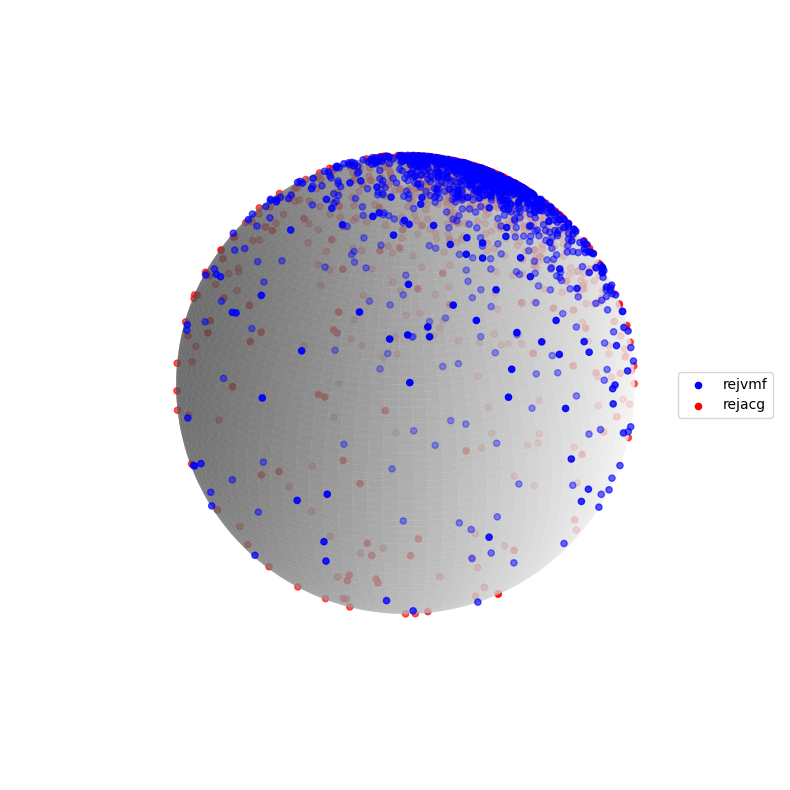

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


# Create a sphere
r = 1
pi = np.pi
cos = np.cos
sin = np.sin
phi, theta = np.mgrid[0.0:pi:100j, 0.0 : 2.0 * pi : 100j]
x = r * sin(phi) * cos(theta)
y = r * sin(phi) * sin(theta)
z = r * cos(phi)

# Import data
data1 = x_rejvmf
data2 = x_rejacg
xx1, yy1, zz1 = np.hsplit(data1, 3)
xx2, yy2, zz2 = np.hsplit(data2, 3)

# Set colours and render
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection="3d")

ax.plot_surface(x, y, z, rstride=1, cstride=1, color="white", alpha=0.6, linewidth=0)

ax.scatter(xx1, yy1, zz1, color="b", s=20, label="rejvmf")
ax.scatter(xx2, yy2, zz2, color="red", s=20, label="rejacg")

ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_aspect("equal")
plt.legend(loc="center right")
plt.tight_layout()
plt.axis("off")
plt.show()
# plt.savefig("rpkb.png",dpi = 600,bbox_inches='tight',pad_inches = 0)